# 构建深层神经网络：一步一步

欢迎参加第4周的作业（第1部分，共2部分）！您以前训练过一个2层神经网络（带有一个隐藏层）。本周，你将建立一个深层次的神经网络，你想要多少层就有多少层！

- 在本笔记本中，您将实现构建深度神经网络所需的所有功能。*
- 在下一个作业中，您将使用这些函数来建立一个用于图像分类的深度神经网络。

**完成此任务后，您将能够：**

- 使用像ReLU这样的非线性单位来改进你的模型
- 建立一个更深层次的神经网络（有一个以上的隐层）
- 实现一个易于使用的神经网络类

开始

## 1-导包

让我们首先导入此任务期间需要的所有包。

- numpy是使用Python进行科学计算的主要包。
- matplotlib是一个用Python绘制图形的库。
- dnn_utils为这个笔记本提供了一些必要的功能。
- testCases提供了一些测试用例来评估函数的正确性
- np.random.seed（1） 用于保持所有随机函数调用的一致性。它将帮助我们给你的作品评分。请不要换种子。

In [4]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from testCases_v3 import *
from dnn_utils_v2 import sigmoid ,sigmoid_backward,relu,relu_backward

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # 设置绘图的默认大小
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2-任务大纲

为了建立你的神经网络，你需要实现几个“辅助函数”。这些辅助函数将在下一个作业中用于构建两层神经网络和L层神经网络。您将实现的每个小助手函数都有详细的说明，指导您完成必要的步骤。这是这项任务的概要，你将：

- 初始化两层网络和L层神经网络的参数。
- 实现前向传播模块（下图中以紫色显示）。
    - 完成层正向传播步骤的线性部分（产生Z[l]）。
    - 我们给你激活函数（relu/sigmoid）。
    - 将前两个步骤组合成一个新的[线性->激活]正向函数。
    - 将[LINEAR->RELU]正向函数L-1叠加一次（对于第1层到第1层），并在最后一层添加一个       [LINEAR->SIGMOID]。这将为您提供一个新的L_model_forward函数。
- 计算损失。
- 实现反向传播模块（下图中用红色表示）。
    - 完成层反向传播步骤的线性部分。
    - 我们给你激活函数的梯度（relu_backward/sigmoid_backward）
    - 将前面的两个步骤组合成一个新的[线性->激活]向后函数。
    - 将[LINEAR->RELU]向后叠加L-1次，并在新的L_model_backward函数中向后添加
    [LINEAR->SIGMOID]
- 最后更新参数。

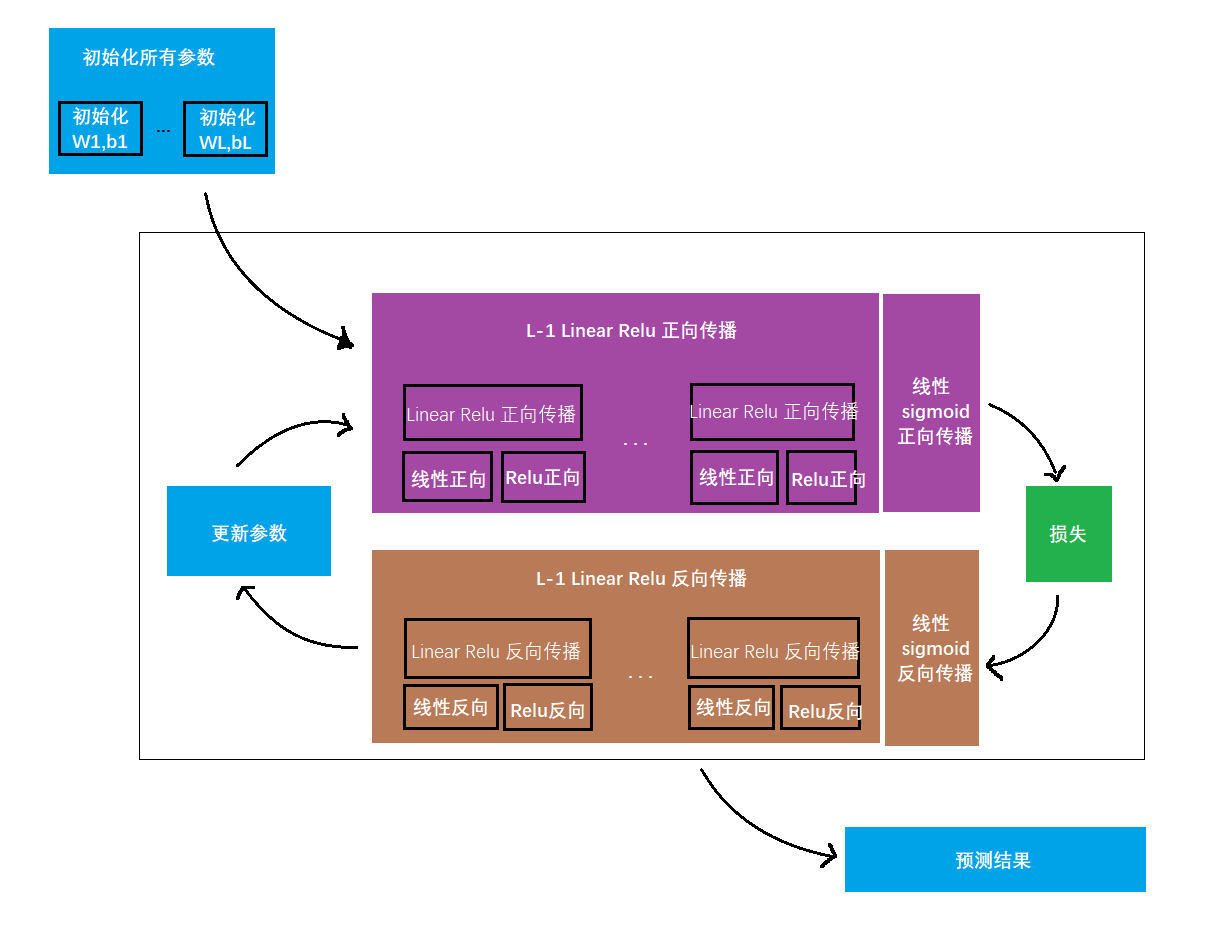

注意，对于每个前向函数，都有一个对应的后向函数。这就是为什么在forward模块的每一步中，您都会在缓存中存储一些值W(l)、b(l)、Z(l)。缓存的值对于计算渐变非常有用。在反向传播模块中，您将使用缓存来计算梯度。本作业将向您展示如何正确执行这些步骤。

## 3-初始化

您将编写两个辅助函数来初始化模型的参数。第一个函数将用于初始化两层模型的参数。第二个将这个初始化过程推广到L层。

### 3.1 - 2层神经网络

**练习**：创建并初始化两层神经网络的参数

**说明：**

- 模型的结构是：LINEAR -> RELU - > LINEAR -> SIGMOID.
- 对权重矩阵(W)使用随机初始化。使用 np.random.randn(shape)\*0.01 创建正确的形状.
- 对偏差(b)使用零初始化。使用 np.zeros(shape).

In [20]:
# 初始化参数：initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    参数：
    n_x -- 输入层的大小
    n_h -- 隐藏层的大小
    n_y -- 输出层的大小
    
    返回：
    参数 -- 包含参数的python字典：
            W1 -- 权重矩阵(n_h,n_x)
            b1 -- 偏重矩阵(n_h,1)
            W2 -- 权重矩阵(n_y,n_h)
            b2 -- 偏重矩阵(n_y,1)
    
    """
    
    # 随机种子
    np.random.seed(1)
    
    # 构建参数矩阵
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    # 使用断言检查矩阵形状是否正确
    
    assert(W1.shape == (n_h,n_x))
    assert(b1.shape == (n_h,1))
    assert(W2.shape == (n_y,n_h))
    assert(b2.shape == (n_y,1))
    
    # 把得到的结果放到字典里
    parameters = {
        "W1" : W1,
        "b1" : b1,
        "W2" : W2,
        "b2" : b2}
    
    # 返回值是存放了权重矩阵和偏值矩阵的字典
    return parameters

In [22]:
# 测试初始化参数函数
parameters = initialize_parameters(3,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[0.]]


## 3.2 - L层神经网络

对于较深的L层神经网络，由于其权值矩阵和偏差向量较多，初始化比较复杂。完成初始化参数时，你应该确保矩阵对应匹配每一层。回想一下，n[l]是l层的单元数。因此，如果输入X的大小为(12288,209)，则：
<table style="width:100%">


   <tr>
        <td>  </td> 
        <td> **Shape of W** </td> 
        <td> **Shape of b**  </td> 
        <td> **Activation** </td>
        <td> **Shape of Activation** </td> 
   <tr>
    
   <tr>
        <td> **Layer 1** </td> 
        <td> $(n^{[1]},12288)$ </td> 
        <td> $(n^{[1]},1)$ </td> 
        <td> $Z^{[1]} = W^{[1]}  X + b^{[1]} $ </td> 
        <td> $(n^{[1]},209)$ </td> 
   <tr>
    
   <tr>
        <td> **Layer 2** </td> 
        <td> $(n^{[2]}, n^{[1]})$  </td> 
        <td> $(n^{[2]},1)$ </td> 
        <td>$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$ </td> 
        <td> $(n^{[2]}, 209)$ </td> 
   <tr>
   
   <tr>
        <td> $\vdots$ </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$</td> 
        <td> $\vdots$  </td> 
   <tr>
    
   <tr>
        <td> **Layer L-1** </td> 
        <td> $(n^{[L-1]}, n^{[L-2]})$ </td> 
        <td> $(n^{[L-1]}, 1)$  </td> 
        <td>$Z^{[L-1]} =  W^{[L-1]} A^{[L-2]} + b^{[L-1]}$ </td> 
        <td> $(n^{[L-1]}, 209)$ </td> 
   <tr>
    
    
   <tr>
        <td> **Layer L** </td> 
        <td> $(n^{[L]}, n^{[L-1]})$ </td> 
        <td> $(n^{[L]}, 1)$ </td>
        <td> $Z^{[L]} =  W^{[L]} A^{[L-1]} + b^{[L]}$</td>
        <td> $(n^{[L]}, 209)$  </td> 
    <tr>

</table>

记住，在python中计算WX+b时，它执行广播。例如，如果：

$$ W = \begin{bmatrix}
    j  & k  & l\\
    m  & n & o \\
    p  & q & r 
\end{bmatrix}\;\;\; X = \begin{bmatrix}
    a  & b  & c\\
    d  & e & f \\
    g  & h & i 
\end{bmatrix} \;\;\; b =\begin{bmatrix}
    s  \\
    t  \\
    u
\end{bmatrix}\tag{2}$$

Then $WX + b$ will be:

$$ WX + b = \begin{bmatrix}
    (ja + kd + lg) + s  & (jb + ke + lh) + s  & (jc + kf + li)+ s\\
    (ma + nd + og) + t & (mb + ne + oh) + t & (mc + nf + oi) + t\\
    (pa + qd + rg) + u & (pb + qe + rh) + u & (pc + qf + ri)+ u
\end{bmatrix}\tag{3}  $$

**练习：**实现L层神经网络的初始化。

**说明：**

- 模型的结构是*[LINEAR -> RELU]\*(L-1) -> LINEAR -> SIGMOID。* 它具有使用ReLU激活函数的L−1层，接着是具有sigmoid激活函数的输出层。
- 对权重矩阵使用随机初始化。使用np.random.rand(shape) * 0.01。
- 对偏差使用零初始化。使用np.zeros(shape)。
- 我们将n[l]，不同层中的单元数，存储在一个可变层中。例如，上周的“平面数据分类模型”的层dims应该是[2,4,1]：有两个输入，一个隐藏层有4个隐藏单元，一个输出层有1个输出单元。因此，W1的形状是（4,2），b1是（4,1），W2是（1,4），b2是（1,1）。现在你要把它推广到L层！
- 下面是L=1（单层神经网络）的实现。它将启发您实现一般情况（L层神经网络）。

if L == 1:
    parameters\["W" + str(L)\] = np.random.randn(layer_dims\[1\],layer_dims\[0\])\*0.01
    parameters\["b" + str(L)\] = np.zeros((layer_dims\[1\],1)





In [27]:
# 初始化多层神经网络参数

def initialize_parameters_deep(layer_dims):
    """
    参数：
    layer_dims -- python数组，包含网络中每一层的单元个数
    
    返回：
    parameters -- 包含参数W1，b1,...,WL,bL的字典
        W[l]的形状：(layer_dims[l],layer_dims[l-1])
        b[l]的形状：(layer_dims[l],1)
    """
    
    # 随机种子
    np.random.seed(3)
    
    # 初始化一个字典
    parameters = {} 
    
    # 深层网络的层数
    L = len(layer_dims)
    
    for i in range(1,L):
        parameters["W"+str(i)] = np.random.randn(layer_dims[i],layer_dims[i-1]) * 0.01
        parameters["b" + str(i)] = np.zeros((layer_dims[i],1))
        
        # 使用断言检查
        assert(parameters["W"+str(i)].shape == (layer_dims[i],layer_dims[i-1])) * 0.01
        assert(parameters["b"+str(i)].shape == (layer_dims[i],1))
        
    
    return parameters

In [44]:
# 测试多层参数初始化模块
parameters = initialize_parameters_deep([5,4,3])
print(len(parameters))
print("W1" + str(parameters["W1"]))
print("b1" + str(parameters["b1"]))
print("W2" + str(parameters["W2"]))
print("b2" + str(parameters["b2"]))

4
W1[[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1[[0.]
 [0.]
 [0.]
 [0.]]
W2[[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2[[0.]
 [0.]
 [0.]]


## 4 - 正向传播模块

### 4.1 - Linear Forward

现在您已经初始化了参数，接下来将执行前向传播模块。您将首先实现一些基本函数，稍后在实现模型时将使用这些函数。您将按此顺序完成三个功能：

- LINEAR
- LINEAR -> ACTIVATION，激活函数为ReLU或Sigmoid。
- \[LINEAR -> RELU\]  ×  (L-1) -> LINEAR -> SIGMOID

线性正向模块（在所有示例中矢量化）计算以下等式：

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}\tag{4}$$

where $A^{[0]} = X$. 

**练习：**构建正向传播的线性部分。

**提醒：**此单位的数学表示为Z\[l\]=W\[l\]A\[l−1\]+b\[l\]。你也可以发现np.dot（）有用。如果尺寸不匹配，打印W.shape可能会有所帮助。

In [34]:
# 正向传播 Linear_forward 模块

def linear_forward(A,W,b):
    """
    实现正向传播的线性部分。
    
    参数：
    A -- 上一层激活函数的输出作为这一层的输入
    W -- 权重矩阵，形状为(W[l],W[l-1])
    b -- 偏差矩阵，形状为(W[l],1)
    
    返回：
    Z -- 激活函数的输入，形状为(W.shape[0],A.shape[1])
    cache -- 一个包含A,W,b的字典，用于高效的计算反向传播
    
    """
    
    Z = np.dot(W,A)+b
    
    # 使用断言检查Z的形状
    assert(Z.shape == (W.shape[0],A.shape[1]))
    
    cache = (A,W,b)
    
    return Z,cache
    

In [37]:
# 测试
A,W,b =  linear_forward_test_case()

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))
print(linear_cache)

Z = [[ 3.26295337 -1.23429987]]
(array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ]]), array([[ 1.74481176, -0.7612069 ,  0.3190391 ]]), array([[-0.24937038]]))


### 4.2 - Linear-Activation Forward

在本笔记本中，您将使用两个激活函数：

 - **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$.我们为您提供了sigmoid函数。此函数返回两项：激活值“a”和包含“Z”的“cache”（这是我们将输入到相应的backward函数的内容）。要使用它，您只需：
 
 A, activation_cache = sigmoid(Z)
 
 
 - ReLU：ReLU的数学公式是$A = RELU(Z) = max(0, Z)$。我们为您提供了relu函数。此函数返回两项：激活值“A”和包含“Z”的“cache”（这是我们将输入到相应的向后函数中的内容）。要使用它，您只需：
 
 A, activation_cache = relu(Z)
 

In [41]:
# 激活函数

def linear_activation_forward(A_prev,W,b,activation):
    """
    实现LINEAR->ACTIVATION的前向传播
    
    参数：
    A_prev -- 上一层激活函数的输出，作为本层激活函数的输入
    W -- 权值
    b -- 偏差
    activation -- 此层中要使用的激活，存储为文本字符串：“sigmoid”或“relu”
    
    返回：
    A -- 激活函数的输出，也称为激活后值
    cache -- 包含“linear_cache”和“activation_cache”的python字典；为有效计算后向传递而存储
    """
    
    if activation == "sigmoid":
        Z,linear_cache = linear_forward(A_prev,W,b)
        A,activation_cache = sigmoid(Z)
        
    elif activation == "relu":
        Z,linear_cache = linear_forward(A_prev,W,b)
        A,activation_cache = relu(Z)
    
    assert(A.shape == (W.shape[0],A_prev.shape[1]))
    
    # 最终的 cache中存放的是 linear_cache:A,W,b,activation_cache:Z
    cache = (linear_cache,activation_cache)
    
    return A,cache
    
    

In [42]:
# 测试
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


**注：**在深度学习中，“\[线性->激活\]”计算被算作神经网络中的一层，而不是两层。

### L层模型

为了在实现L层神经网络时更加方便，您将需要一个函数，该函数将前一个（线性激活向前与RELU）L−1次复制，然后用一个线性激活向前与SIGMOID复制。

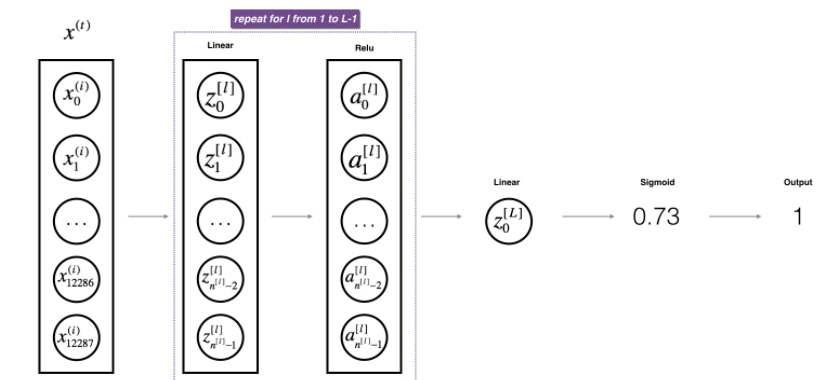

**练习：**实现上述模型的正向传播。

说明：在下面的代码中，变量AL表示$A^{[L]} = \sigma(Z^{[L]}) = \sigma(W^{[L]} A^{[L-1]} + b^{[L]})$。（有时也称为$\hat{Y}$）

**提示：**

- 使用以前编写的函数
- 使用for循环复制[LINEAR->RELU]（L-1）次
- 别忘了跟踪“缓存”列表中的缓存。要将新值cache添加到列表中，可以使用列表.append（cache）。

In [53]:
# L_model_forward 函数

def L_model_forward(X,parameters):
    """
    参数：
    X -- 数据，形状的numpy数组（输入大小，示例数）
    parameters -- initialize_parameters_deep()的输出
    
    返回：
    AL -- 上次激活后值
    caches -- 包含以下内容的缓存列表：
                linear_relu_forward（）的每个缓存
                linear_sigmoid_forward（）的缓存
    """
    caches = []
    A = X
    L = len(parameters)//2
    
    for i in range(1,L):
        A_prev = A
        A,cache = linear_activation_forward(A_prev,parameters["W"+str(i)],parameters["b"+str(i)],"relu")
        caches.append(cache)
    
    AL,cache = linear_activation_forward(A,parameters["W"+str(L)],parameters["b"+str(L)],"sigmoid")
    
    assert(AL.shape == (1,X.shape[1]))
    
    return AL,caches

In [56]:
# 测试
X, parameters = L_model_forward_test_case_2hidden()
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
Length of caches list = 2


## 5 - 损失函数

现在您将实现向前和向后传播。你需要计算成本，因为你想检查你的模型是否真的在学习。

练习：使用以下公式计算交叉熵成本J：

$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$


In [57]:
# 损失函数

def compute_cost(AL,Y):
    """
    参数：
    AL -- 与标签预测相对应的概率向量，形状（1，X.shape[1]）
    Y -- 真实值,形状(1,m)
    
    返回：
    cost -- 交叉熵成本
    
    """
    
    m = Y.shape[1]
    
    cost = -(np.dot(np.log(AL),Y.T)+np.dot(np.log(1-AL),(1-Y).T))/m
    
    # 降维
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return cost
    
    

In [59]:
# 测试

Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.414931599615397


## 6 - 反向传播模块

就像正向传播一样，您将实现反向传播的辅助函数。
反向传播用于计算损失函数相对于参数的梯度。、

**提醒：**

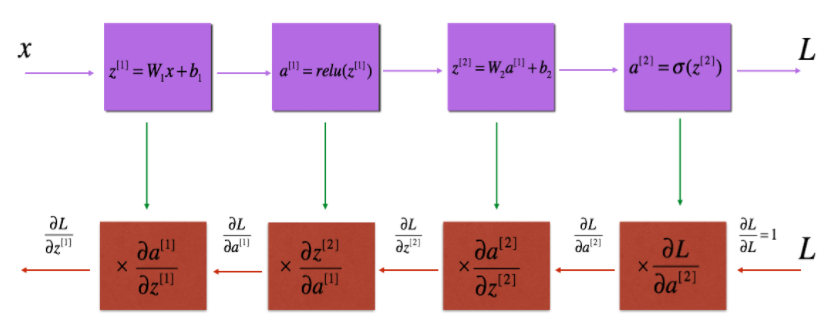


与正向传播类似，您将分三步构建反向传播：

- LINEAR backward
- LINEAR -> ACTIVATION，激活计算ReLU或sigmoid激活的导数
- \[LINEAR -> RELU\]  ×  (L-1) -> LINEAR -> SIGMOID向后（整个模型）

### 6.1-线性向后

对于层l，线性部分为：Z[l]=W[l]A[l−1]+b[l]。
假设你已经计算了导数$dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. 你想得到$(dW^{[l]}, db^{[l]} dA^{[l-1]})$.

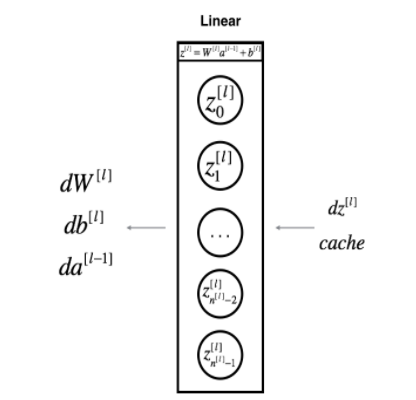

三个输出（dW[l]、db[l]、dA[l]）是使用输入dZ[l]计算的。下面是您需要的公式：

$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$

In [61]:
# linear_backward

def linear_backward(dZ,cache):
    """
    参数：
    dZ -- 相对于线性输出的成本梯度（当前层l）
    cache -- 来自当前层中的前向传播的值的元组（A_prev, W, b）
    
    返回：
    dA_prev -- 相对于激活（前一层l-1）的成本梯度，形状与前一层相同'
    dW -- 相对于W（当前层l）的成本梯度，与W形状相同
    db -- 相对于b（当前层l）的成本梯度，与b形状相同
    """
    A_prev,W,b = cache
    m = A_prev.shape[1]
    dW = np.dot(dZ,A_prev.T)/m
    db = np.sum(dZ,axis=1,keepdims=True)/m
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape) 
    
    return dA_prev,dW,db
    

In [62]:
# 测试
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[0.50629448]]


## 6.2 - Linear-Activation backward 反向激活函数

接下来，您将创建一个合并两个辅助函数的函数：linear_backward和激活linear_activation_backward
的后退步骤

为了帮助您实现线性linear_activation_backward，我们提供了两个backward函数：
sigmoid_backward:实现SIGMOID单元的反向传播。你可以这样称呼它：
    dZ = sigmoid_backward(dA, activation_cache)
relu_backward:实现RELU单元的反向传播。你可以这样称呼它：
    dZ = relu_backward(dA, activation_cache)

**练习：**实现线性->激活层的反向传播。

In [67]:
def linear_activation_backward(dA,cache,activation):
    """
    参数：
    dA -- 梯度
    cache -- 我们存储的值元组（线性缓存、激活缓存）用于高效地计算反向传播
    activation -- 这个层中要使用的激活，以文本字符串形式存储：“sigmoid”或“relu”
    
    返回：
    dA_prev -- 相对于激活（前一层l-1）的成本梯度，形状与前一层相同
    dW——成本相对于W（当前层l）的梯度，形状和W相同
    db——成本相对于b（当前层l）的梯度，与b的形状相同
    """
    
    linear_cache,activation_cache = cache   # 分别是A_prev,W,b   和   Z
    
    if activation == "relu":
        dZ = relu_backward(dA,activation_cache)
        dA_prev,dW,db = linear_backward(dZ,linear_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev,dW,db = linear_backward(dZ,linear_cache)
    return dA_prev,dW,db

In [68]:
# 测试
AL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))


sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989 -0.        ]
 [ 0.37883606 -0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


### 6.3 - L-Model Backward

现在您将实现整个网络的向后功能。回想一下，当您实现L_model_forward函数时，在每次迭代中，您存储了一个包含（X、W、b和z）的缓存。在反向传播模块中，您将使用这些变量来计算梯度。因此，在L_model_backward函数中，您将从L层开始向后遍历所有隐藏层。在每一步中，您将使用层l的缓存值通过层l进行反向传播。下面的图5显示了向后传递。

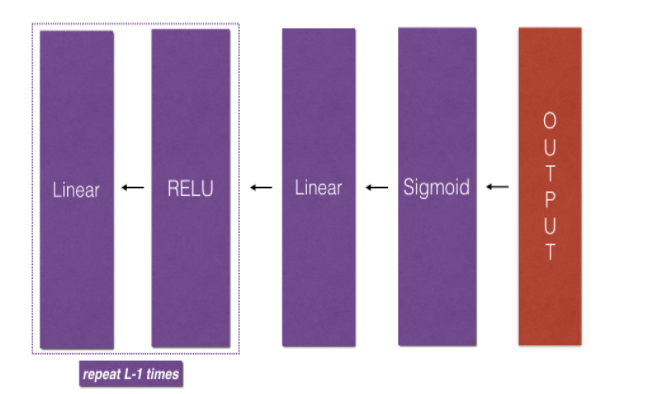

**初始化反向传播**：要通过这个网络反向传播，我们知道输出是，$A^{[L]} = \sigma(Z^{[L]})$.。因此，您的代码需要计算 `dAL` $= \frac{\partial \mathcal{L}}{\partial A^{[L]}}$.

为此，请使用以下公式（使用不需要深入了解的微积分导出）：

```python
dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) 
```
然后可以使用这个激活后渐变“dAL”来继续向后。如图5所示，现在可以将'dAL'输入到实现的LINEAR->SIGMOID backward函数中（该函数将使用由L_model_forward函数存储的缓存值）。之后，您将不得不使用“for”循环，使用LINEAR->RELU backward函数遍历所有其他层。您应该将每个dA、dW和db存储在grads字典中。为此，请使用以下公式：

$$grads["dW" + str(l)] = dW^{[l]}\tag{15} $$

例如 $l=3$ 这会储存 $dW^{[l]}$ in `grads["dW3"]`.

**练习**：为*\[LINEAR->RELU\]$\times$（L-1）->LINEAR->SIGMOID*模型实现反向传播。

In [71]:
# 完整的反向传播
def L_model_backward(AL,Y,caches):
    # 梯度
    grads = {}
    L = len(caches)
    m = AL.shape[1] # 是训练集的数量
    Y = Y.reshape(AL.shape)
    
    dAL = -(np.divide(Y,AL) - np.divide(1 - Y,1 - AL))
    
    current_cache = caches[L-1]
    # 只有最后一层的激活函数是sigmoid
    grads["dA"+str(L)],grads["dW"+str(L)],grads["db"+str(L)] = linear_activation_backward(dAL,current_cache,activation="sigmoid")
    
    for i in reversed(range(L-1)):
        current_cache = caches[i]
        dA_prev_temp,dW_temp,db_temp = linear_activation_backward(grads["dA"+str(i+2)],current_cache,activation="relu")
        grads["dA"+str(i+1)] = dA_prev_temp
        grads["dW"+str(i+1)] = dW_temp
        grads["db"+str(i+1)] = db_temp
        
    return grads

In [72]:
# 测试
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print_grads(grads)

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


### 6.4 - 更新参数

在本节中，您将使用渐变下降更新模型的参数：

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

其中$\alpha$是学习率。计算更新后的参数后，将其存储在参数字典中。

In [74]:
# 更新参数

def update_parameters(parameters,grads,learning_rate):
    L = len(parameters)//2
    
    for i in range(1,L+1):
        parameters["W"+str(i)] -= learning_rate * grads["dW" + str(i)]
        parameters["b"+str(i)] -= learning_rate * grads["db" + str(i)]
        
    return parameters

In [75]:
# 测试参数 
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


## 7 - 总结

恭喜你实现了构建深度神经网络所需的所有功能！

我们知道这是一项很长的任务，但今后只会越来越好。作业的下一部分比较容易。

在下一个作业中，你将把所有这些放在一起构建两个模型：

- 两层神经网络

- L层神经网络

事实上，您将使用这些模型来分类猫与非猫的图像！